# Group Randomizer
The "Group Randomizer" program is an application designed to manage and randomizer lists of names, primarily for group creation or random name selection.

# BUTTONS for Clear Last Name and Clear All 


# Error
 In the first code errors happened because some of the widgets and variables were being used before they were properly set up. For example, when creating the buttons, the code tried to use things like self.button_frame and self.button_font, but if those weren’t initialized first, the code would crash. The fix was simply making sure that all the things the buttons rely on, like the button frame and font, are defined before the buttons are created. Another issue was with the self.text_names widget. It was supposed to be a Text widget, but if it wasn’t set up correctly, the methods that tried to change or get its text wouldn’t work, causing an error. The fix was ensuring self.text_names was properly initialized as a Text widget. The clear_all method was also being used in the button command, but if that method didn’t exist before the button was created, it would cause an error. So, the fix was making sure that method is defined ahead of time. In the long run, there were some issues with how the widgets behaved after certain actions were performed, like clearing the text in the result_display widget. The fix involved making sure the widget’s state is properly managed during and after actions like clearing the text. In short, the errors were fixed by ensuring everything was set up in the right order, with all the necessary widgets and methods properly initialized before they were used. This made sure the program ran smoothly without any crashes!

In [ ]:
         self.clear_all_button = tk.Button(
            self.button_frame, text="Clear All", font=self.button_font, bg=self.highlight_color,
            fg=self.bg_color, command=self.clear_all)
        self.clear_all_button.pack(side="left", padx=10)

   def clear_last_word(self):
        current_text = self.text_names.get("1.0", tk.END).strip()
        if current_text:
            words = current_text.split(',')
            updated_text = ', '.join(words[:-1]).strip()
            self.text_names.delete("1.0", tk.END)
            self.text_names.insert("1.0", updated_text)

    def clear_all(self):
        self.text_names.delete("1.0", tk.END)



# Fixed Code


In [ ]:
self.clear_button = tk.Button(
        self.button_frame, text="Clear Last Name", font=self.button_font, bg="khaki2", fg="gray12", command=self.clear_last_word)
        self.clear_button.pack(side="left", padx=10)

        self.clear_all_button = tk.Button(
        self.button_frame, text="Clear All", font=self.button_font, bg="khaki2", fg="gray12", command=self.clear_all)
        self.clear_all_button.pack(side="left", padx=10)

    def clear_last_word(self):
        current_text = self.text_names.get("1.0", tk.END).strip()
        if current_text:
            words = current_text.split(',')
            updated_text = ', '.join(words[:-1]).strip()
            self.text_names.delete("1.0", tk.END)
            self.text_names.insert("1.0", updated_text)

    def clear_all(self):	
        self.text_names.delete("1.0", tk.END)
        self.entry_groups.delete(0, tk.END)		
        self.random_name_label.config(text="") 
        self.result_display.config(state="normal") 
        self.result_display.delete("1.0", tk.END)  
        self.result_display.config(state="disabled")  


# Results:
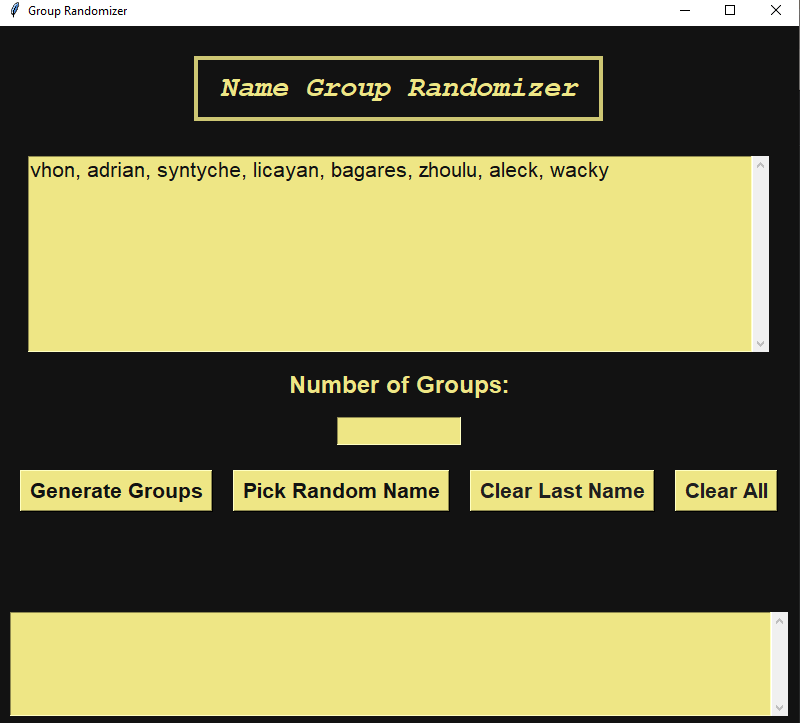 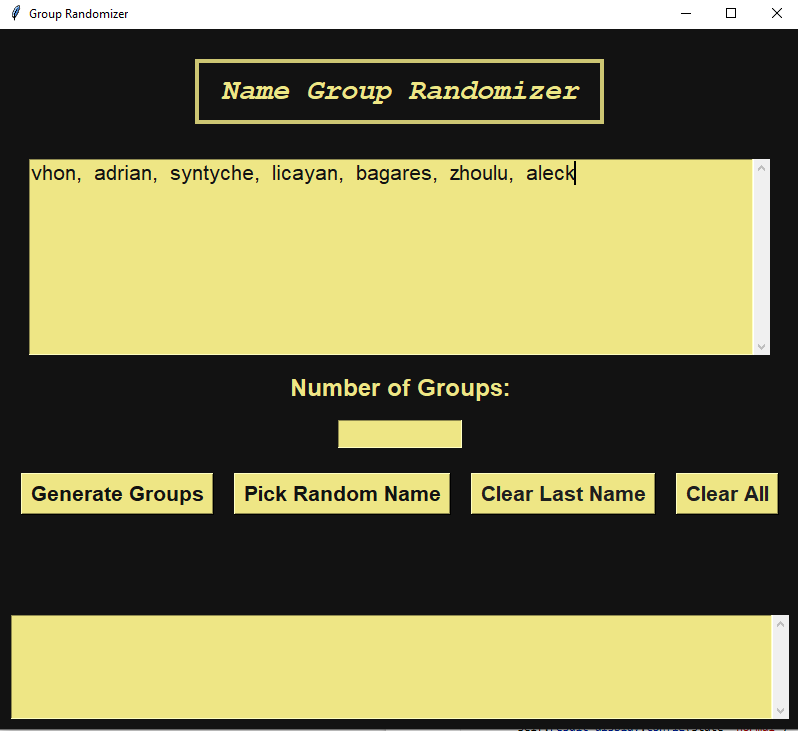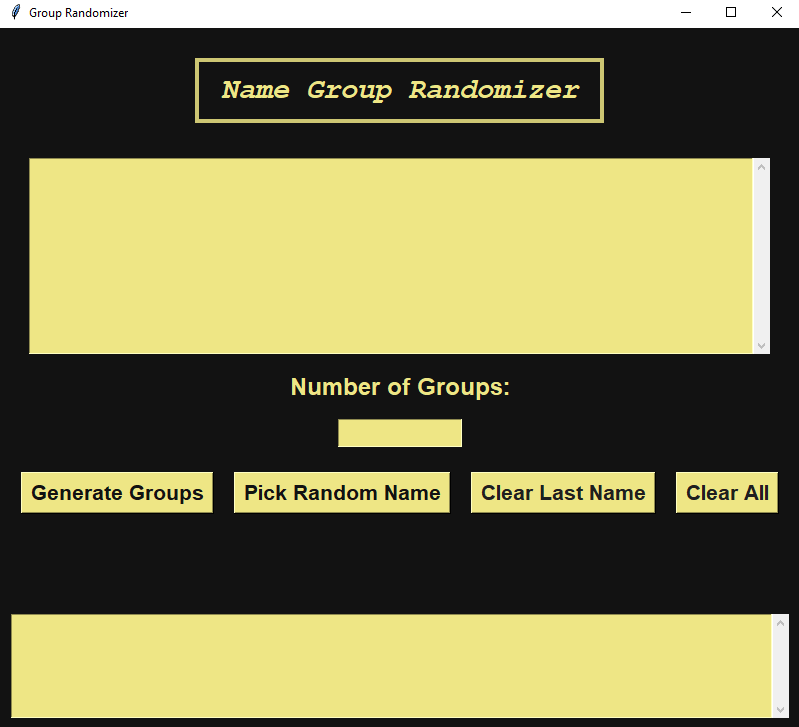

# SCROLLBAR in Names Entry Box and Generated Groups Display


# Error
The code had layout and functionality issues, such as missing frames for grouping widgets, incorrect packing order, and misplaced configuration commands. For the Names Entry Box, the Text widget and its scrollbar were not contained in a frame, leading to alignment problems, and the scrollbar was packed before the Text widget. Similarly, the Generated Groups Display lacked a frame, and configuration commands like yscrollcommand were misapplied. The fixed version resolves these by grouping the widgets within frames, ensuring proper packing order (Text first, scrollbar second), and placing configurations like yscrollcommand and state="disabled" after initializing and packing the widgets. These adjustments ensure proper alignment, functionality, and a cleaner layout.


In [ ]:
Names Entry Box:
        # Scrollbar for Names Entry
        self.scrollbar_names = tk.Scrollbar(self.frame, orient="vertical", command=self.text_names.yview)
        self.scrollbar_names.pack(side="right", fill="y")

        # Configure the scrollbar to scroll with the names entry box
        self.text_names.config(yscrollcommand=self.scrollbar_names.set)

Generated Groups Display:
        self.scrollbar_results = tk.Scrollbar(self.result_frame)
        self.scrollbar_results.pack(side="right", fill="y")

        self.result_display = tk.Text(self.result_frame, font=self.result_font, bg="khaki2", fg="gray7", height=35, width=20,wrap=tk.WORD, yscrollcommand=self.scrollbar_results.set)
        self.result_display.pack(fill="both", expand=True)

        self.scrollbar_results.config(command=self.result_display.yview)
        self.result_display.config(state="disabled")


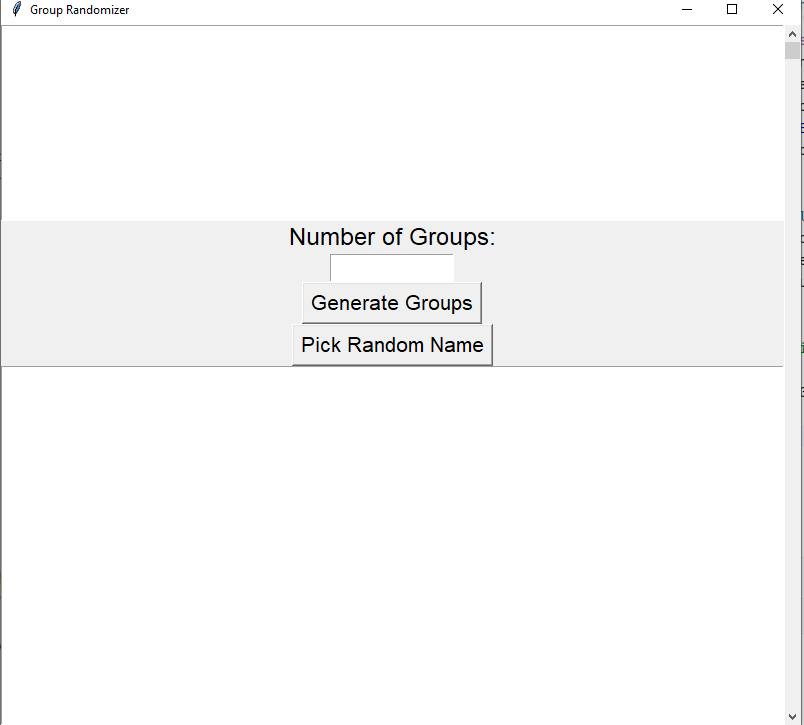

# Fixed Code

In [ ]:
Names Entry Box: 

# Create a frame to contain both the Text widget and its Scrollbar
        self.names_frame = tk.Frame(self.frame, bg="gray7")
        self.names_frame.pack(pady=5)

# Text Widget for Names
        self.text_names = tk.Text(self.names_frame, font=self.entry_font, bg="khaki2", fg="gray7", height=8, width=60, wrap=tk.WORD)
        self.text_names.pack(side="left", fill="both", expand=True)

# Scrollbar for Names Entry
        self.scrollbar_names = tk.Scrollbar(self.names_frame, orient="vertical", command=self.text_names.yview)
        self.scrollbar_names.pack(side="right", fill="y")

# Configure the scrollbar to scroll with the text widget
        self.text_names.config(yscrollcommand=self.scrollbar_names.set)

Generated Groups Display:

# Frame for results and scrollbar
        self.result_frame = tk.Frame(self.frame, bg="gray7")
        self.result_frame.pack(fill="both", expand=True, pady=10)

# Results Display
        self.result_display = tk.Text(self.result_frame, font=self.result_font, bg="khaki2", fg="gray7", height=35, width=60,
                              wrap=tk.WORD)
        self.result_display.pack(side="left", fill="both", expand=True)

# Scrollbar for results
        self.scrollbar_results = tk.Scrollbar(self.result_frame, orient="vertical", command=self.result_display.yview)
        self.scrollbar_results.pack(side="right", fill="y")

# Configure the scrollbar to scroll with the text widget
        self.result_display.config(yscrollcommand=self.scrollbar_results.set)



# Results:
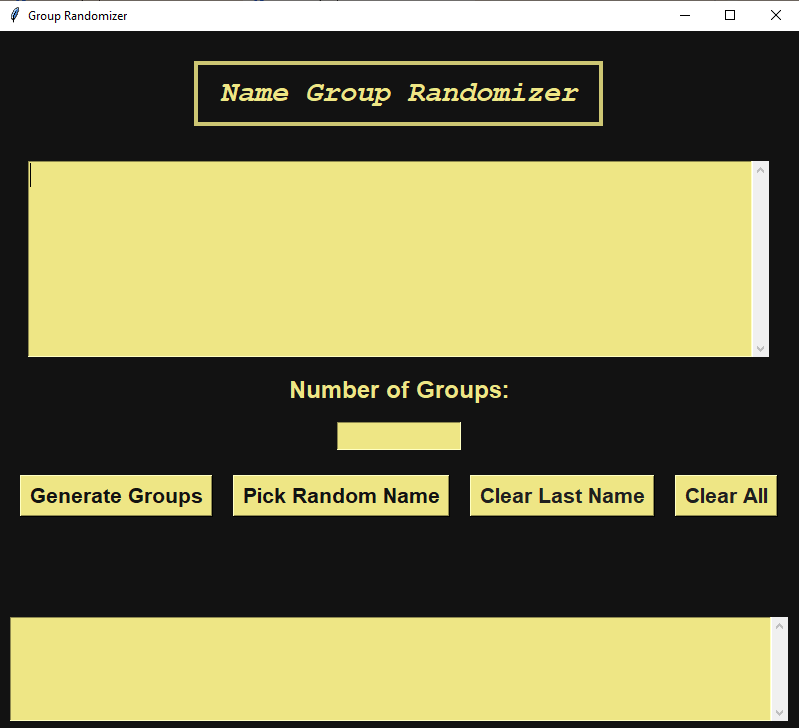

# VALIDATION to check if all the names in the list are separated by commas

# Error
The original code lacked proper validation for ensuring names were formatted as comma-separated strings, leading to issues like unexpected behavior and misleading error messages. To fix this, a validation step was added to the validate_items() method in the RandomizerBase class, checking that each name contains a comma. If not, the program raises a clear error message: “Names must be separated by commas.” This ensures invalid inputs are caught early and improves error clarity. By placing the validation in the base class, all derived classes benefit, making the program more robust, consistent, and user-friendly.

In [ ]:
(“Invalid number of groups!")

import random
 
class RandomizerBase:             
    def __init__(self, items):    
        self.items = items

    def validate_items(self):    
        if not self.items:
            raise ValueError("No names provided!")  

class GroupRandomizer(RandomizerBase): 
    def __init__(self, items):        
        super().__init__(items)

    def create_groups(self, num_groups):   
        self.validate_items()              
        if num_groups <= 0 or num_groups > len(self.items): 
            raise ValueError("Invalid number of groups!")   


# Fixed Code

In [7]:
import random
 
class RandomizerBase:             
    def __init__(self, items):    
        self.items = items

    def validate_items(self):    
        if not self.items:
            raise ValueError("No names provided!")  
        for item in self.items:
            if ',' not in item:
                raise ValueError("Names must be separated by commas.")

class GroupRandomizer(RandomizerBase): 
    def __init__(self, items):        
        super().__init__(items)

    def create_groups(self, num_groups):   
        self.validate_items()              
        if num_groups <= 0 or num_groups > len(self.items): 
            raise ValueError("Invalid number of groups!")   


# Results:

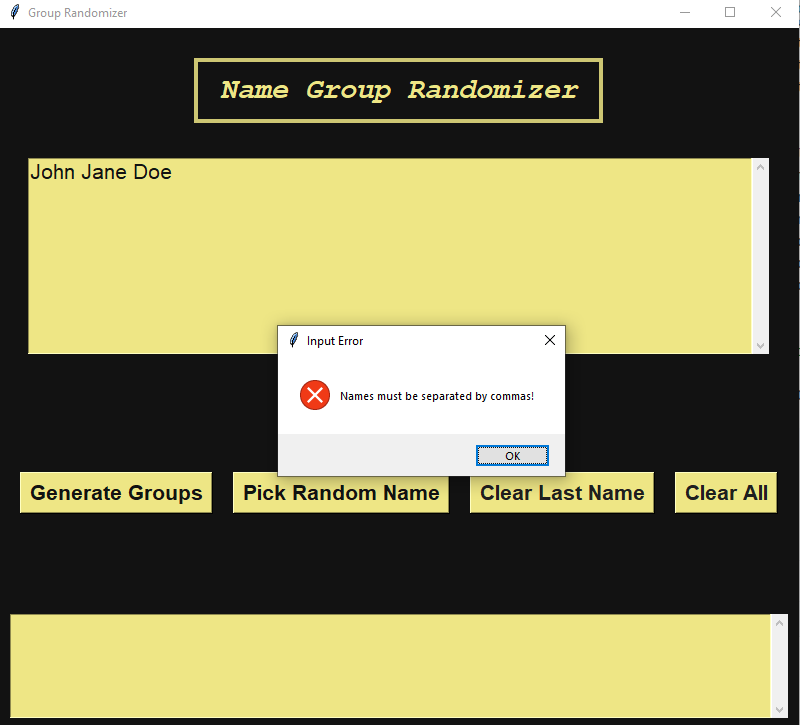